In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
from glob import glob
glob('/content/drive/MyDrive/aqulife/train/*')

['/content/drive/MyDrive/aqulife/train/Angelfish',
 '/content/drive/MyDrive/aqulife/train/Arowana Fish',
 '/content/drive/MyDrive/aqulife/train/Catla or Indian Carp fish',
 '/content/drive/MyDrive/aqulife/train/Betta Fish',
 '/content/drive/MyDrive/aqulife/train/Discus Fish',
 '/content/drive/MyDrive/aqulife/train/Guppy Fish',
 '/content/drive/MyDrive/aqulife/train/Clownfish',
 '/content/drive/MyDrive/aqulife/train/Magur or Walking Catfish fish',
 '/content/drive/MyDrive/aqulife/train/Hilsa or Ilish Shad fish',
 '/content/drive/MyDrive/aqulife/train/Goldfish',
 '/content/drive/MyDrive/aqulife/train/Koi Fish',
 '/content/drive/MyDrive/aqulife/train/Oscar Fish',
 '/content/drive/MyDrive/aqulife/train/Neon Tetra',
 '/content/drive/MyDrive/aqulife/train/Tilapia or Cichlid Fish',
 '/content/drive/MyDrive/aqulife/train/Pulasa Fish',
 '/content/drive/MyDrive/aqulife/train/Rani or Pink Perch fish',
 '/content/drive/MyDrive/aqulife/train/Tengra or Mystus Tengara fish']

In [ ]:
import glob
from glob import glob
glob('/content/drive/MyDrive/aqulife/test/*')

['/content/drive/MyDrive/aqulife/test/Angelfish',
 '/content/drive/MyDrive/aqulife/test/Guppy Fish',
 '/content/drive/MyDrive/aqulife/test/Catla or Indian Carp fish',
 '/content/drive/MyDrive/aqulife/test/Betta Fish',
 '/content/drive/MyDrive/aqulife/test/Goldfish',
 '/content/drive/MyDrive/aqulife/test/Arowana Fish',
 '/content/drive/MyDrive/aqulife/test/Discus Fish',
 '/content/drive/MyDrive/aqulife/test/Clownfish',
 '/content/drive/MyDrive/aqulife/test/Hilsa or Ilish Shad fish',
 '/content/drive/MyDrive/aqulife/test/Koi Fish',
 '/content/drive/MyDrive/aqulife/test/Magur or Walking Catfish fish',
 '/content/drive/MyDrive/aqulife/test/Rani or Pink Perch fish',
 '/content/drive/MyDrive/aqulife/test/Oscar Fish',
 '/content/drive/MyDrive/aqulife/test/Tengra or Mystus Tengara fish',
 '/content/drive/MyDrive/aqulife/test/Pulasa Fish',
 '/content/drive/MyDrive/aqulife/test/Tilapia or Cichlid Fish',
 '/content/drive/MyDrive/aqulife/test/Neon Tetra']

In [ ]:
import os

In [ ]:
training_data_path =  '/content/drive/MyDrive/aqulife/train'
test_data_path = '/content/drive/MyDrive/aqulife/test'

# Now you should be able to access the directory
os.listdir(training_data_path)

['Angelfish',
 'Arowana Fish',
 'Catla or Indian Carp fish',
 'Betta Fish',
 'Discus Fish',
 'Guppy Fish',
 'Clownfish',
 'Magur or Walking Catfish fish',
 'Hilsa or Ilish Shad fish',
 'Goldfish',
 'Koi Fish',
 'Oscar Fish',
 'Neon Tetra',
 'Tilapia or Cichlid Fish',
 'Pulasa Fish',
 'Rani or Pink Perch fish',
 'Tengra or Mystus Tengara fish']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(training_data_path,
                                             target_size=(64,64),
                                             color_mode='rgb',
                                             class_mode="categorical",
                                             batch_size=64)

Found 1811 images belonging to 17 classes.


In [ ]:

x_test = test_datagen.flow_from_directory(test_data_path,
                                           target_size=(64,64),
                                           color_mode='rgb',
                                           class_mode="categorical",
                                           batch_size=64)

Found 457 images belonging to 17 classes.


In [ ]:
# Modules

from keras import Sequential

from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense

In [ ]:
cnn = Sequential(name='binary_cnn')

In [ ]:
cnn.add(Conv2D(input_shape=(64,64,3), filters = 32, kernel_size=(3,3), strides=(2,2), name='Conv1'))
cnn.add(Activation('relu'))
cnn.summary()

Model: "binary_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 31, 31, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 31, 31, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool1'))
cnn.summary()

Model: "binary_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 31, 31, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 30, 30, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.add(Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), name='Conv2'))
cnn.add(Activation('relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool2'))

In [ ]:
cnn.add(Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), name='Conv3'))
cnn.add(Activation('relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool3'))

In [ ]:
cnn.summary()

Model: "binary_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 31, 31, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 15, 15, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 7, 7, 16)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 6, 6, 16)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,000 (15.62 KB)

 Trainable params: 4,000 (15.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.add(Flatten(name='Flatten'))

In [ ]:
cnn.summary()

Model: "binary_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 31, 31, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 15, 15, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 7, 7, 16)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 576)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,000 (15.62 KB)

 Trainable params: 4,000 (15.62 KB)

 Non-trainable params: 0 (0.00 B)

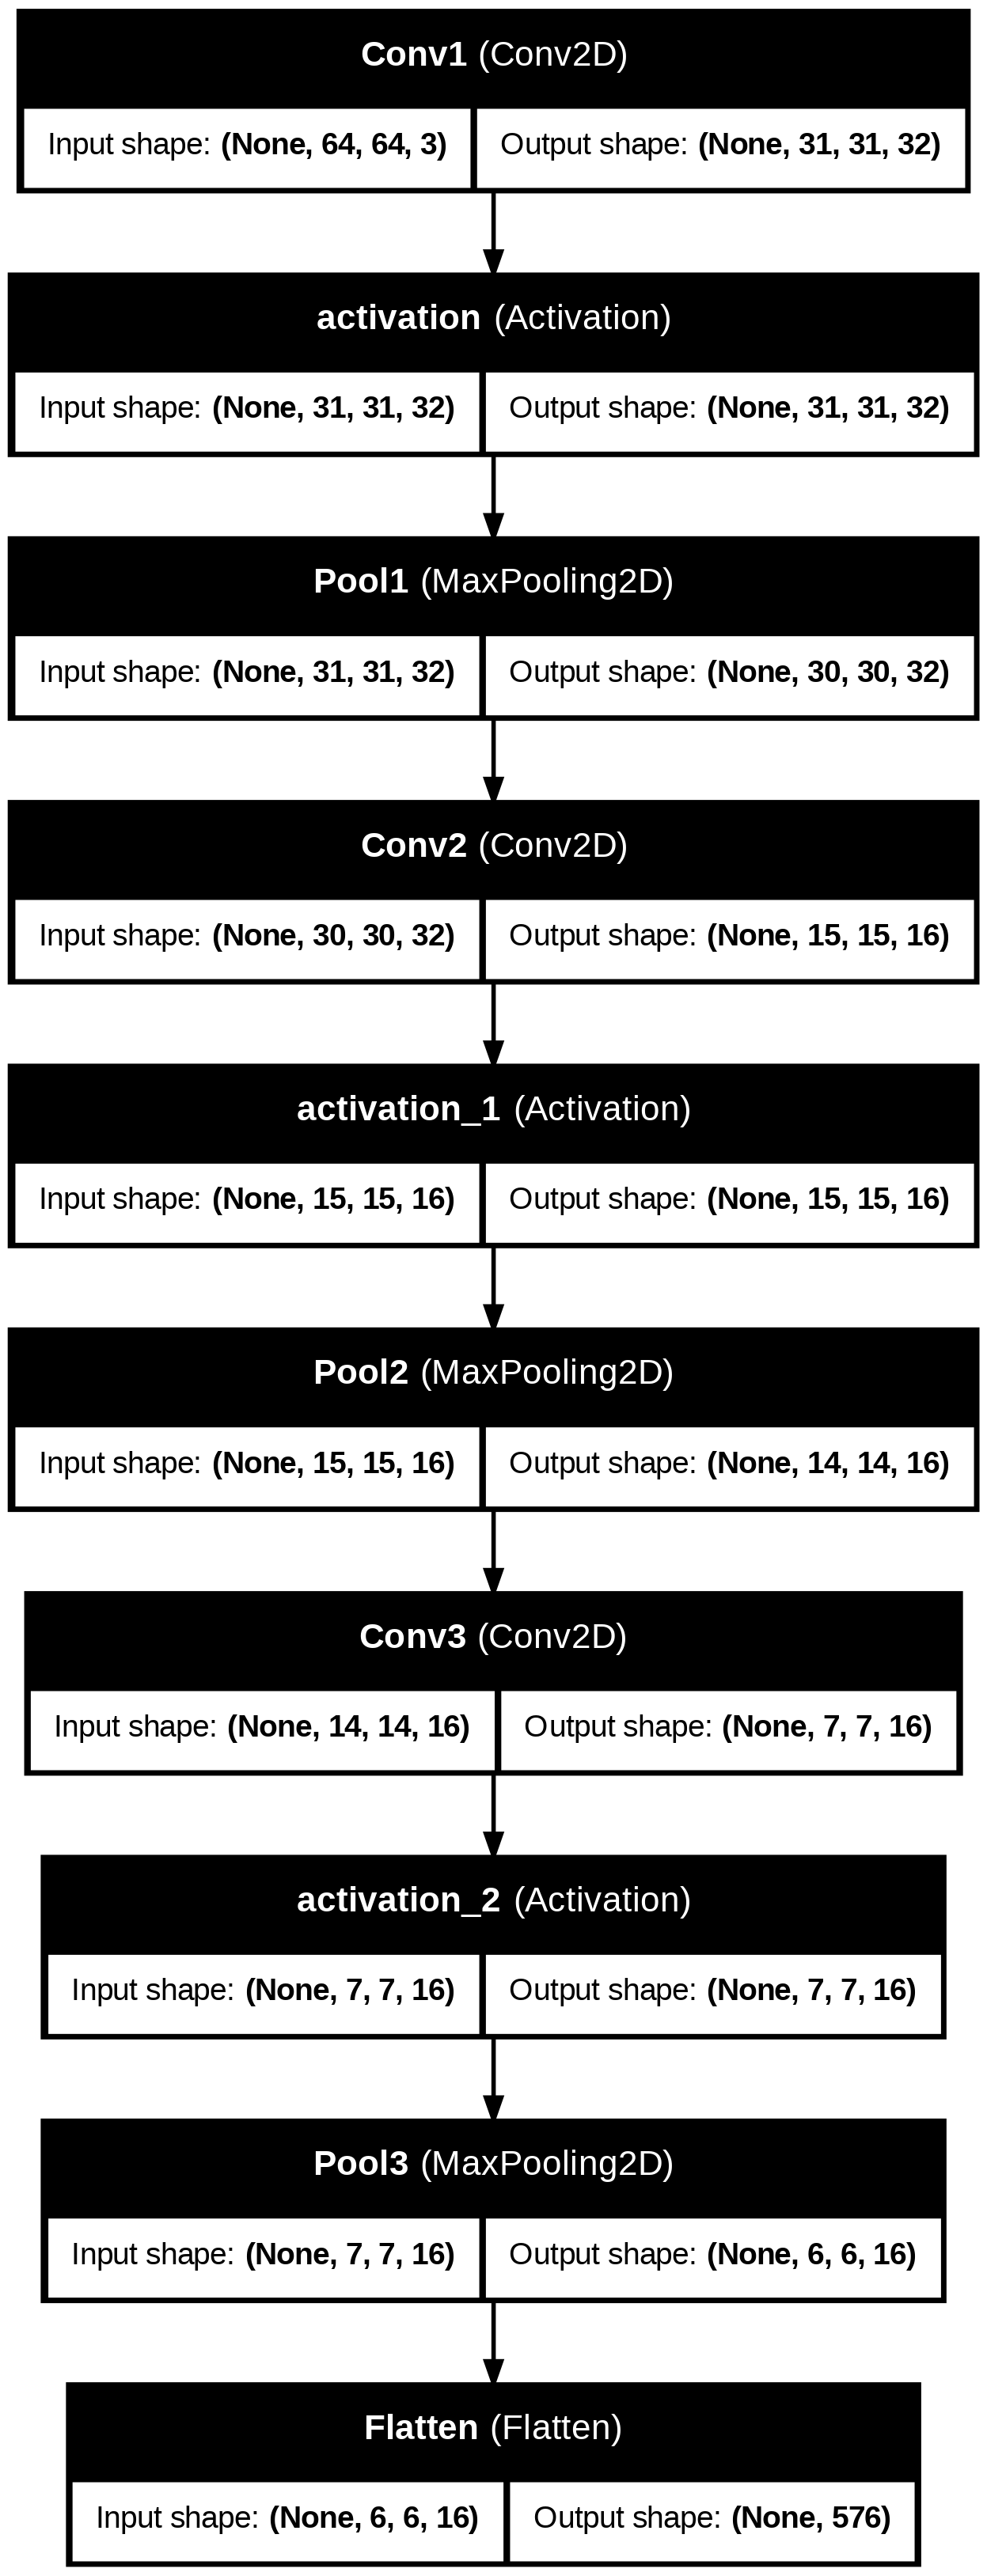

In [ ]:
from keras.utils import plot_model
plot_model(cnn,show_layer_names=True,show_shapes=True)

In [ ]:
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=576))
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=288))
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=144))

In [ ]:
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
cnn.add(Dense(kernel_initializer='random_uniform', activation='softmax', units=17))

In [ ]:
cnn.summary()

Model: "binary_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 31, 31, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 15, 15, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 7, 7, 16)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 576)                 │         332,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 288)                 │         166,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 144)                 │          41,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 17)                  │           2,465 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546,609 (2.09 MB)

 Trainable params: 546,609 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

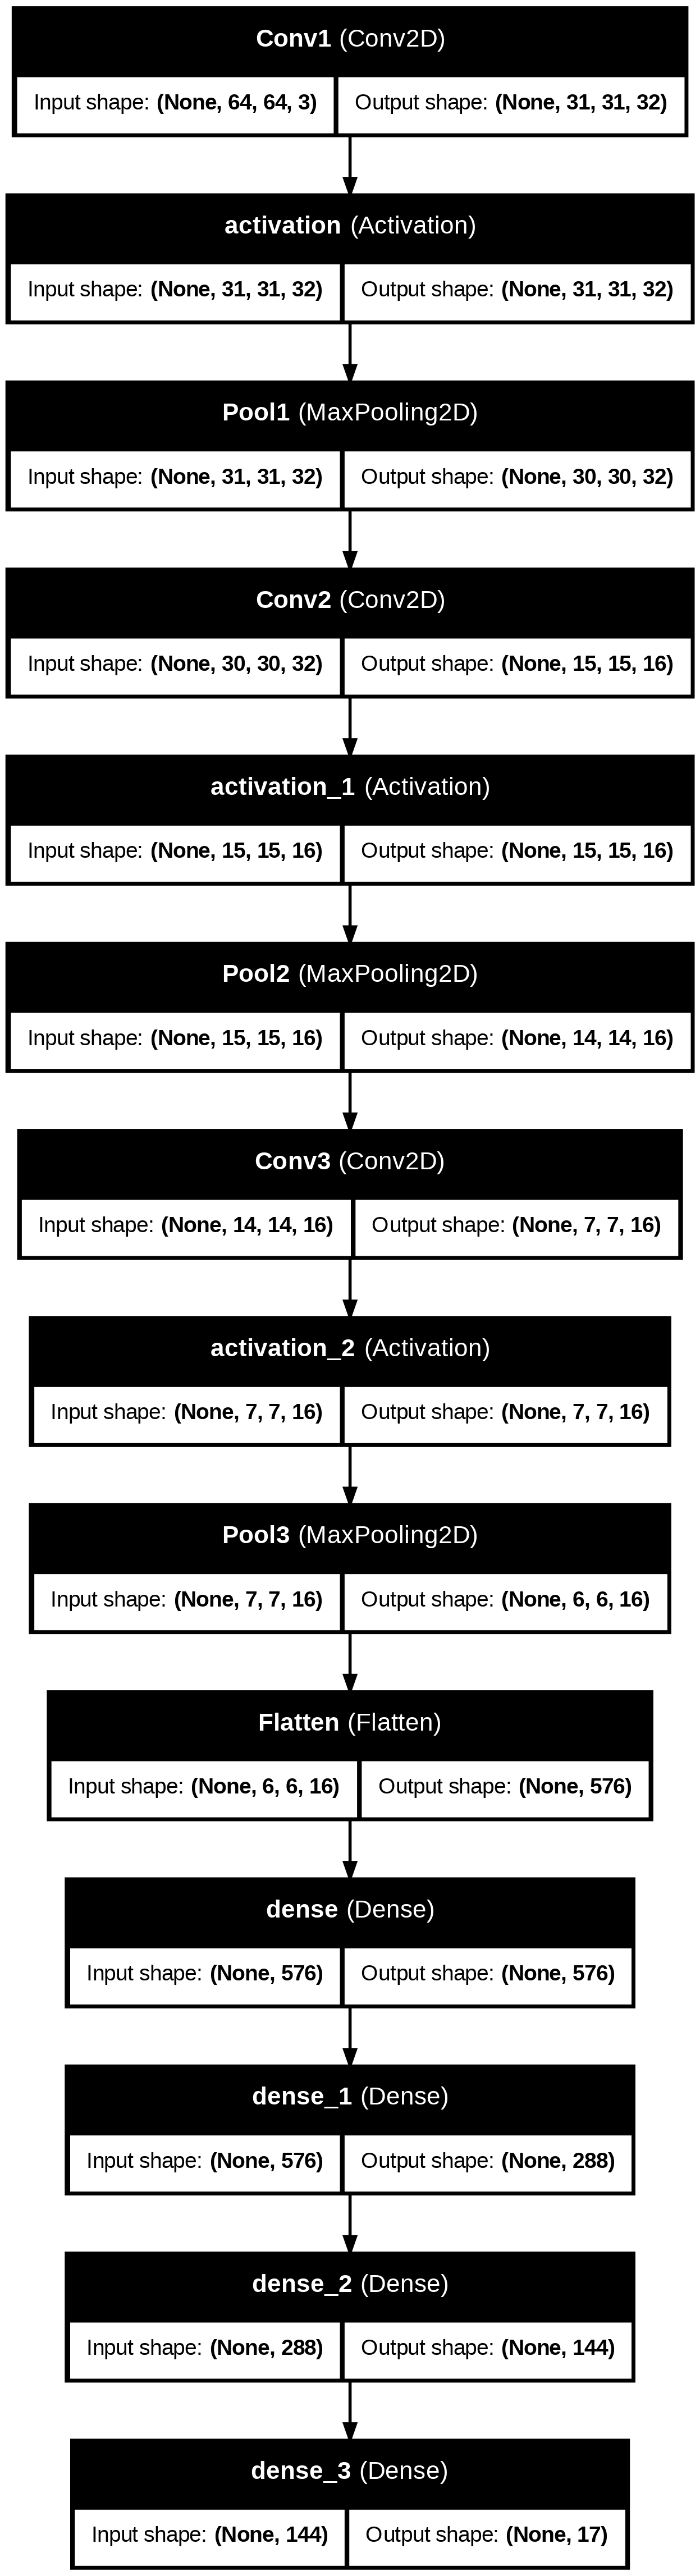

In [ ]:
from keras.utils import plot_model
plot_model(cnn,show_layer_names=True,show_shapes=True)

In [ ]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


cnn.fit(x_train, epochs=25, validation_data=x_test)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 1179s 33s/step - accuracy: 0.1080 - loss: 2.7955 - val_accuracy: 0.1182 - val_loss: 2.7293
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 995ms/step - accuracy: 0.1139 - loss: 2.7144 - val_accuracy: 0.1182 - val_loss: 2.6246
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 961ms/step - accuracy: 0.1357 - loss: 2.5827 - val_accuracy: 0.1707 - val_loss: 2.4975
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2012 - loss: 2.4347 - val_accuracy: 0.1947 - val_loss: 2.4524
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2508 - loss: 2.3369 - val_accuracy: 0.1860 - val_loss: 2.5015
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2298 - loss: 2.3328 - val_accuracy: 0.2123 - val_loss: 2.3701
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 971ms/step - accuracy: 0.2413 - loss: 2.2896 - val_accuracy: 0.2101 - val_loss: 2.3964
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2689 - loss: 2.2331 - val_accuracy: 0.2363

In [ ]:
cnn.save('model.h5')

In [ ]:
cnn.save_weights('custom.weights.h5')

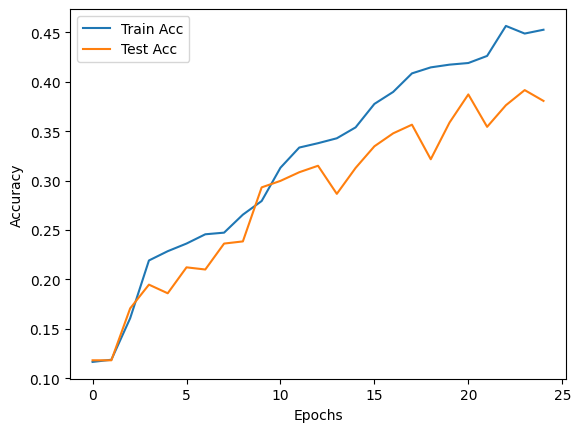

In [ ]:
import matplotlib.pyplot as plt

# Get the total number of epochs from the training history
num_epochs = len(cnn.history.history['accuracy'])

# Plot the accuracy values for all epochs
plt.plot(list(range(0, num_epochs)), cnn.history.history['accuracy'], label="Train Acc")
plt.plot(list(range(0, num_epochs)), cnn.history.history['val_accuracy'], label="Test Acc")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

# Step 1: Load the Saved Model
model_path = 'model.h5'  # Replace with your saved model path
cnn = load_model(model_path)
print("Model loaded successfully.")

# Step 2: Prepare the Input Photo
def prepare_image(image_path, target_size=(64, 64)):

    img = load_img(image_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = '/content/drive/MyDrive/aqulife/test/Angelfish/Angelfish_18.jpg'  # Replace with the path to your input image
prepared_image = prepare_image(image_path)

# Step 3: Make Predictions
predictions = cnn.predict(prepared_image)
print("Class probabilities:", predictions)

# Step 4: Get Predicted Class Index and Label
class_index = np.argmax(predictions)  # Get the index of the highest probability
print("Predicted class index:", class_index)

# Map class index to a human-readable label
# Replace these labels with your actual class labels
class_labels = {0: 'Angelfish', 1: 'Arowana Fish', 2: 'Betta Fish', 3: 'Catla or Indian Fish',
                4: 'Clownfish', 5: 'Discus Fish', 6: 'Goldfish', 7: 'Guppy Fish', 8: 'Hilsa or llish Shad fish',
                9:'Koi Fish', 10:'Magur or Walking Catfish fish', 11:'Neon Tetra', 12:'Oscar Fish', 13:'Pulsa Fish',
                14:'Rani or Pink Perch fish', 15:'Tngra or Mystus Tengara fish', 16:'Tilapia or Cichild Fish'}

# Get the predicted label
predicted_label = class_labels.get(class_index, "Unknown")
print("Predicted class label:", predicted_label)


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
Class probabilities: [[8.3759928e-01 1.0847596e-02 5.6461520e-02 1.0985921e-04 2.6469280e-03
  1.3185722e-02 4.2345799e-03 1.7669560e-02 1.9594218e-04 3.0953865e-04
  8.6780069e-03 9.4607165e-03 2.0814588e-02 1.3174809e-03 9.2971482e-04
  2.9778436e-03 1.2561055e-02]]
Predicted class index: 0
Predicted class label: Angelfish


In [ ]:
import cv2
import numpy as np

def classify(frame):

    img=cv2.resize(frame,(64,64))


    if(np.max(img)>1):
        img = img/255.0

    img = np.array([img])
    prediction = cnn.predict(img)[0]

    classes = {v: k for k, v in x_train.class_indices.items()}

    cls = classes[np.argmax(prediction)]

    return cls

Given Image:



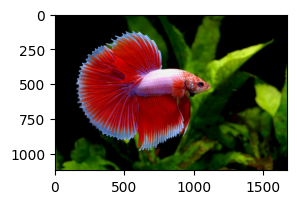


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction Name: Discus Fish



In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

images = '/content/drive/MyDrive/aqulife/test/Betta Fish/Image_113.jpg'

# The variable 'images' contains the image path,
# so we need to use 'images' instead of 'img' in cv2.imread()
image = cv2.imread(images, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # cv2 loads as BGR

print("Given Image:")
print()
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()
print()
resized_image = cv2.resize(image, (64, 64))
resized_image = resized_image.astype(np.float32)
out = classify(resized_image)
print("Prediction Name:",out)
print()
print("=================================================================")